# Clustering

- `CLASE` (Clase del accidente):
     - 1: Fatal
     - 2: No fatal
     - 3: Sólo daños

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

In [66]:
df = pd.read_csv('../data/processed/cleaned_nacional.csv')

In [67]:
df.columns

Index(['EDO', 'MES', 'ANIO', 'MPIO', 'HORA', 'MINUTOS', 'DIA', 'DIASEMANA',
       'URBANA', 'SUBURBANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS',
       'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR',
       'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC', 'CAUSAACCI',
       'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'EDAD', 'CONDMUERTO',
       'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO',
       'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'TOTMUERTOS',
       'TOTHERIDOS', 'CLASE', 'CALLE1', 'LONGITUD', 'LATITUD'],
      dtype='object')

In [68]:
df = df.drop(['ANIO', 'CALLE1'], axis=1)

In [69]:
scaler = StandardScaler()

## Clase

In [70]:
columns = [
    'EDO', 'MES', 'MPIO', 'HORA', 'MINUTOS', 'DIA', 'DIASEMANA', 'URBANA', 
    'SUBURBANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION', 
    'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 
    'MOTOCICLET', 'BICICLETA', 'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO', 
    'ALIENTO', 'CINTURON', 'EDAD', 'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO', 
    'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO', 
    'OTROMUERTO', 'OTROHERIDO', 'TOTMUERTOS', 'TOTHERIDOS', 'LONGITUD', 'LATITUD'
]

In [71]:
df[columns] = scaler.fit_transform(df[columns])

In [72]:
X = df.drop('CLASE', axis=1).values

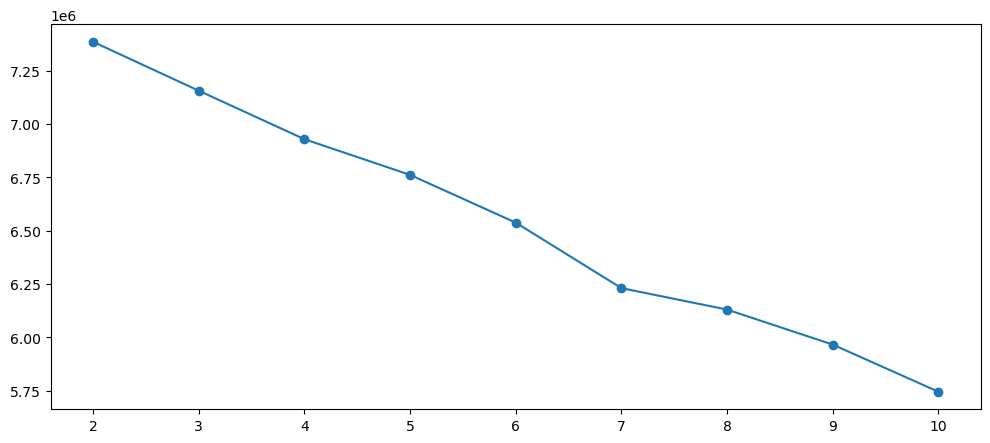

In [73]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 5))

plt.plot(k_values, inertia, marker='o')

plt.show()

In [74]:
k_optimo = 7
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

In [75]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

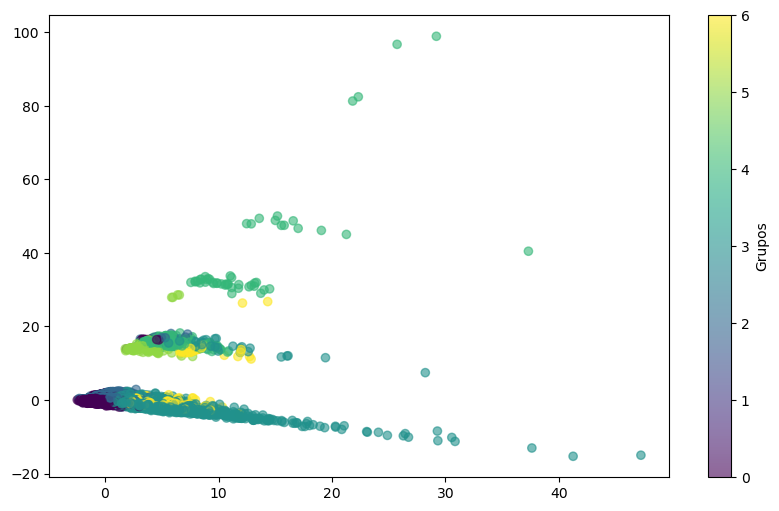

In [76]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.colorbar(scatter, label="Grupos")
plt.show()

In [77]:
df['Cluster_Clase'] = clusters

In [78]:
df.head()

,EDO,MES,MPIO,HORA,MINUTOS,DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,...,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,TOTMUERTOS,TOTHERIDOS,CLASE,LONGITUD,LATITUD,Cluster_Clase
0,-2.165054,-1.594583,-1.024762,-1.474830,-1.464281,-1.435568,0.014067,-0.094438,-0.105214,0.461349,...,-0.01767,-0.077016,-0.004711,-0.015137,-0.072148,-0.312784,3,-0.091561,-0.619848,2
1,-2.165054,-1.594583,-1.024762,-0.632074,1.070078,-1.435568,0.014067,-0.094438,-0.105214,-0.533663,...,-0.01767,-0.077016,-0.004711,-0.015137,-0.072148,-0.312784,3,-0.084749,-0.607292,0
2,-2.165054,-1.594583,-1.024762,-0.463522,0.788483,-1.435568,0.014067,-0.094438,-0.105214,-0.533663,...,-0.01767,-0.077016,-0.004711,-0.015137,-0.072148,-0.312784,3,-0.088801,-0.611541,0
3,-2.165054,-1.594583,-1.024762,0.210683,1.633269,-1.435568,0.014067,-0.094438,-0.105214,2.451372,...,-0.01767,-0.077016,-0.004711,-0.015137,-0.072148,1.342421,2,-0.086260,-0.626309,3
4,-2.165054,-1.594583,-1.024762,1.053439,-1.464281,-1.435568,0.014067,-0.094438,-0.105214,-0.533663,...,-0.01767,-0.077016,-0.004711,-0.015137,-0.072148,-0.312784,3,-0.087636,-0.619069,0


In [79]:
clase_por_grupo = df.groupby('Cluster_Clase')['CLASE'].value_counts(normalize=True) * 100
print("Porcentaje de clase de accidente por grupo:")
print(clase_por_grupo)

Porcentaje de clase de accidente por grupo:
Cluster_Clase  CLASE
0              3         95.006979
               2          4.964387
               1          0.028634
1              3         74.193548
               2         25.806452
2              3         86.210496
               2         13.734934
               1          0.054570
3              2         52.674595
               3         46.975135
               1          0.350270
4              1        100.000000
5              1        100.000000
6              2         51.677560
               3         45.795207
               1          2.527233
Name: proportion, dtype: float64


In [80]:
# slice(None) -> similar a : en Cluster_Clase
# 1 -> donde CLASE == 1
clusters_fatales = clase_por_grupo.loc[(slice(None), 1)][clase_por_grupo.loc[(slice(None), 1)] > 90].index
clusters_fatales 

Index([4, 5], dtype='int32', name='Cluster_Clase')

In [83]:
clusters_no_fatales = clase_por_grupo.loc[(slice(None), 2)][clase_por_grupo.loc[(slice(None), 2)] > 50].index
clusters_no_fatales 

Index([3, 6], dtype='int32', name='Cluster_Clase')

In [82]:
clusters_danos = clase_por_grupo.loc[(slice(None), 3)][clase_por_grupo.loc[(slice(None), 3)] > 70].index
clusters_danos 

Index([0, 1, 2], dtype='int32', name='Cluster_Clase')

In [84]:
df[columns] = scaler.inverse_transform(df[columns])

In [85]:
col_exclude = ['LONGITUD', 'LATITUD']
df.loc[:, ~df.columns.isin(col_exclude)] = df.loc[:, ~df.columns.isin(col_exclude)].astype(int)

In [86]:
df_fatal = df[df['Cluster_Clase'].isin(clusters_fatales)]

print(f"Total de accidentes de los grupos con mayor riesgo a ser FATALES: {len(df_fatal)}")
print(f"Total de accidentes fatales de los grupos con mayor riesgo a ser FATALES: {len(df_fatal[df_fatal['CLASE'] == 1])}")

Total de accidentes de los grupos con mayor riesgo a ser fatales: 864
Total de accidentes fatales de los grupos con mayor riesgo a ser fatales: 864


In [87]:
df_no_fatal = df[df['Cluster_Clase'].isin(clusters_no_fatales)]

print(f"Total de accidentes de los grupos con mayor riesgo a ser NO FATALES: {len(df_no_fatal)}")
print(f"Total de accidentes no fatales de los grupos con mayor riesgo a ser NO FATALES: {len(df_no_fatal[df_no_fatal['CLASE'] == 2])}")

Total de accidentes de los grupos con mayor riesgo a ser no fatales: 25420
Total de accidentes no fatales de los grupos con mayor riesgo a ser no fatales: 13367


In [88]:
df_danos = df[df['Cluster_Clase'].isin(clusters_danos)]

print(f"Total de accidentes de los grupos con mayor probabilidad a ser SÓLO DAÑOS: {len(df_danos)}")
print(f"Total de accidentes de sólo daños de los grupos con mayor probabilidad a ser SÓLO DAÑOS: {len(df_danos[df_danos['CLASE'] == 3])}")

Total de accidentes de los grupos con mayor probabilidad a ser sólo daños: 153935
Total de accidentes de sólo daños de los grupos con mayor probabilidad a ser sólo daños: 142535


In [118]:
for cluster in clusters_fatales:
    fatal_cluster = df[(df['Cluster_Clase'] == cluster) & (df['CLASE'] == 1)]
    print(f'Cluster {cluster}: {len(df[df["Cluster_Clase"] == cluster])} accidentes\n')
    print(f"Número de accidentes fatales en Cluster {cluster}:", fatal_cluster['CLASE'].count())
    print(f"Moda del día de la semana de accidentes fatales en Cluster {cluster}: {fatal_cluster['DIASEMANA'].mode().iloc[0]}")
    print(f"Hora promedio de accidentes fatales en Cluster {cluster}: {fatal_cluster['HORA'].mean():.2f}")
    print(f"Edad promedio de accidentes fatales en Cluster {cluster}: {fatal_cluster['EDAD'].mean():.2f}")
    print(f"Moda de aliento de accidentes fatales en Cluster {cluster}: {fatal_cluster['ALIENTO'].mode().iloc[0]}")
    print(f"Moda de cinturón de accidentes fatales en Cluster {cluster}: {fatal_cluster['CINTURON'].mode().iloc[0]}")
    print(f"Moda de capa de rodamiento de accidentes fatales en Cluster {cluster}: {fatal_cluster['CAPAROD'].mode().iloc[0]}")
    print('-'*75)

Cluster 4: 445 accidentes

Número de accidentes fatales en Cluster 4: 445
Moda del día de la semana de accidentes fatales en Cluster 4: 7.0
Hora promedio de accidentes fatales en Cluster 4: 10.73
Edad promedio de accidentes fatales en Cluster 4: 39.40
Moda de aliento de accidentes fatales en Cluster 4: 5.0
Moda de cinturón de accidentes fatales en Cluster 4: 9.0
Moda de capa de rodamiento de accidentes fatales en Cluster 4: 1.0
---------------------------------------------------------------------------
Cluster 5: 419 accidentes

Número de accidentes fatales en Cluster 5: 419
Moda del día de la semana de accidentes fatales en Cluster 5: 7.0
Hora promedio de accidentes fatales en Cluster 5: 13.38
Edad promedio de accidentes fatales en Cluster 5: 29.24
Moda de aliento de accidentes fatales en Cluster 5: 6.0
Moda de cinturón de accidentes fatales en Cluster 5: 9.0
Moda de capa de rodamiento de accidentes fatales en Cluster 5: 1.0
------------------------------------------------------------

In [119]:
for cluster in clusters_no_fatales:
    no_fatal_cluster = df[(df['Cluster_Clase'] == cluster) & (df['CLASE'] == 2)]
    print(f'Cluster {cluster}: {len(df[df["Cluster_Clase"] == cluster])} accidentes\n')
    print(f"Número de accidentes no fatales en Cluster {cluster}:", no_fatal_cluster['CLASE'].count())
    print(f"Moda del día de la semana de accidentes no fatales en Cluster {cluster}: {no_fatal_cluster['DIASEMANA'].mode().iloc[0]}")
    print(f"Hora promedio de accidentes no fatales en Cluster {cluster}: {no_fatal_cluster['HORA'].mean():.2f}")
    print(f"Edad promedio de accidentes no fatales en Cluster {cluster}: {no_fatal_cluster['EDAD'].mean():.2f}")
    print(f"Moda de aliento de accidentes no fatales en Cluster {cluster}: {no_fatal_cluster['ALIENTO'].mode().iloc[0]}")
    print(f"Moda de cinturón de accidentes no fatales en Cluster {cluster}: {no_fatal_cluster['CINTURON'].mode().iloc[0]}")
    print(f"Moda de capa de rodamiento de accidentes no fatales en Cluster {cluster}: {no_fatal_cluster['CAPAROD'].mode().iloc[0]}")
    print('-'*75)

Cluster 3: 23125 accidentes

Número de accidentes no fatales en Cluster 3: 12181
Moda del día de la semana de accidentes no fatales en Cluster 3: 6.0
Hora promedio de accidentes no fatales en Cluster 3: 13.20
Edad promedio de accidentes no fatales en Cluster 3: 38.39
Moda de aliento de accidentes no fatales en Cluster 3: 5.0
Moda de cinturón de accidentes no fatales en Cluster 3: 9.0
Moda de capa de rodamiento de accidentes no fatales en Cluster 3: 1.0
---------------------------------------------------------------------------
Cluster 6: 2295 accidentes

Número de accidentes no fatales en Cluster 6: 1186
Moda del día de la semana de accidentes no fatales en Cluster 6: 2.0
Hora promedio de accidentes no fatales en Cluster 6: 14.14
Edad promedio de accidentes no fatales en Cluster 6: 39.42
Moda de aliento de accidentes no fatales en Cluster 6: 5.0
Moda de cinturón de accidentes no fatales en Cluster 6: 9.0
Moda de capa de rodamiento de accidentes no fatales en Cluster 6: 1.0
------------

In [120]:
for cluster in clusters_danos:
    danos_cluster = df[(df['Cluster_Clase'] == cluster) & (df['CLASE'] == 3)]
    print(f'Cluster {cluster}: {len(df[df["Cluster_Clase"] == cluster])} accidentes\n')
    print(f"Número de accidentes de sólo daños en Cluster {cluster}:", danos_cluster['CLASE'].count())
    print(f"Moda del día de la semana de accidentes de sólo daños en Cluster {cluster}: {danos_cluster['DIASEMANA'].mode().iloc[0]}")
    print(f"Hora promedio de accidentes de sólo daños en Cluster {cluster}: {danos_cluster['HORA'].mean():.2f}")
    print(f"Edad promedio de accidentes de sólo daños en Cluster {cluster}: {danos_cluster['EDAD'].mean():.2f}")
    print(f"Moda de aliento de accidentes de sólo daños en Cluster {cluster}: {danos_cluster['ALIENTO'].mode().iloc[0]}")
    print(f"Moda de cinturón de accidentes de sólo daños en Cluster {cluster}: {danos_cluster['CINTURON'].mode().iloc[0]}")
    print(f"Moda de capa de rodamiento de accidentes de sólo daños en Cluster {cluster}: {danos_cluster['CAPAROD'].mode().iloc[0]}")
    print('-'*75)

Cluster 0: 111756 accidentes

Número de accidentes de sólo daños en Cluster 0: 106176
Moda del día de la semana de accidentes de sólo daños en Cluster 0: 5.0
Hora promedio de accidentes de sólo daños en Cluster 0: 12.69
Edad promedio de accidentes de sólo daños en Cluster 0: 44.67
Moda de aliento de accidentes de sólo daños en Cluster 0: 5.0
Moda de cinturón de accidentes de sólo daños en Cluster 0: 9.0
Moda de capa de rodamiento de accidentes de sólo daños en Cluster 0: 1.0
---------------------------------------------------------------------------
Cluster 1: 31 accidentes

Número de accidentes de sólo daños en Cluster 1: 23
Moda del día de la semana de accidentes de sólo daños en Cluster 1: 4.0
Hora promedio de accidentes de sólo daños en Cluster 1: 12.48
Edad promedio de accidentes de sólo daños en Cluster 1: 18.57
Moda de aliento de accidentes de sólo daños en Cluster 1: 6.0
Moda de cinturón de accidentes de sólo daños en Cluster 1: 9.0
Moda de capa de rodamiento de accidentes de s

Como resumen, se puede decir lo siguiente de los grupos resultantes con mayor probabilidad a ser de cada clase (Fatal, No fatal, Sólo daños):

### Accidentes **Fatales**:
- Día de la semana con más accidentes: **Domingo**
- Horas promedio: **10 y 13**
- Edades promedio: **29 y 39**
- Aliento: **"No" y "Se ignora"**
- Cinturón: **"Se ignora"**
- Capa de rodamiento: **"Pavimentada"**

### Accidentes **No Fatales**:
- Día de la semana con más accidentes: **Martes y Sábado**
- Horas promedio: **13 y 14**
- Edades promedio: **38 y 39**
- Aliento: **"No"**
- Cinturón: **"Se ignora"**
- Capa de rodamiento: **"Pavimentada"**

### Accidentes **Sólo Daños**:
- Día de la semana con más accidentes: **Jueves, Viernes y Sábado**
- Horas promedio: **12**
- Edades promedio: **18, 22 y 44**
- Aliento: **"No" y "Se ignora"**
- Cinturón: **"Se ignora"**
- Capa de rodamiento: **"Pavimentada"**

In [124]:
df['FATAL'] = df['Cluster_Clase'].isin(clusters_fatales).astype(int)
X = df.drop(['CLASE', 'Cluster_Clase', 'FATAL'], axis=1)
y = df['FATAL']

In [125]:
rfc_fatal = RandomForestClassifier()

rfc_fatal.fit(X, y)

RandomForestClassifier()

In [126]:
fatal_vars = pd.Series(rfc_fatal.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Variables más importantes para detectar fatalidad en accidentes:")
print(fatal_vars.head(10))

Variables más importantes para detectar fatalidad en accidentes:
TOTMUERTOS    0.536553
PEATMUERTO    0.235143
PASAMUERTO    0.050480
TIPACCID      0.020533
CICLMUERTO    0.013951
LATITUD       0.013337
PEATHERIDO    0.013154
LONGITUD      0.012358
BICICLETA     0.008541
HORA          0.007694
dtype: float64


In [127]:
df['NOFATAL'] = df['Cluster_Clase'].isin(clusters_no_fatales).astype(int)
X = df.drop(['CLASE', 'Cluster_Clase', 'NOFATAL'], axis=1)
y = df['NOFATAL']

In [128]:
rfc_no_fatal = RandomForestClassifier()

rfc_no_fatal.fit(X, y)

RandomForestClassifier()

In [129]:
no_fatal_vars = pd.Series(rfc_no_fatal.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Variables más importantes para detectar no fatalidad en accidentes:")
print(no_fatal_vars.head(10))

Variables más importantes para detectar no fatalidad en accidentes:
TIPACCID      0.342707
MOTOCICLET    0.306868
CONDHERIDO    0.103756
TOTHERIDOS    0.063261
BICICLETA     0.031936
PASAHERIDO    0.031334
AUTOMOVIL     0.019186
LATITUD       0.014151
LONGITUD      0.013568
CICLHERIDO    0.009237
dtype: float64


In [130]:
df['SOLODANOS'] = df['Cluster_Clase'].isin(clusters_danos).astype(int)
X = df.drop(['CLASE', 'Cluster_Clase', 'SOLODANOS'], axis=1)
y = df['SOLODANOS']

In [131]:
rfc_danos = RandomForestClassifier()

rfc_danos.fit(X, y)

RandomForestClassifier()

In [132]:
danos_vars = pd.Series(rfc_danos.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Variables más importantes para detectar accidentes con sólo daños:")
print(danos_vars.head(10))

Variables más importantes para detectar accidentes con sólo daños:
NOFATAL       0.386994
MOTOCICLET    0.213057
TIPACCID      0.185018
CONDHERIDO    0.055620
TOTHERIDOS    0.050355
BICICLETA     0.023076
PASAHERIDO    0.017813
TOTMUERTOS    0.013488
FATAL         0.012486
AUTOMOVIL     0.009462
dtype: float64
